In [1]:
import botorch.optim
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Read the CSV file
data = pd.read_csv('./data.csv')
print(data)
features = data.iloc[:, 0:4]
print(features)

     x1   x2     x3     x4       y1     y2
0   1.0  1.0  0.010  0.010   125.68  0.680
1   1.2  1.0  0.010  0.010   122.40  0.700
2   1.4  1.0  0.010  0.010   122.89  0.710
3   1.6  1.0  0.010  0.010   128.24  0.720
4   1.0  1.2  0.010  0.010   125.66  0.680
5   1.0  1.4  0.010  0.010   122.42  0.710
6   1.0  1.6  0.010  0.010   121.75  0.780
7   1.0  1.0  0.010  0.010   125.05  0.770
8   1.0  1.0  0.004  0.010   553.21  0.870
9   1.0  1.0  0.006  0.010   251.95  0.790
10  1.0  1.0  0.012  0.010   125.66  0.680
11  1.0  1.0  0.010  0.004   104.69  0.630
12  1.0  1.0  0.010  0.004   920.32  0.640
13  1.0  1.0  0.010  0.006   335.00  0.630
14  1.0  1.0  0.010  0.010   125.66  0.680
15  1.0  1.0  0.010  0.012    95.84  0.630
16  1.3  1.3  0.008  0.008   283.18  0.867
17  1.0  1.3  0.008  0.004  2884.98  0.869
18  1.6  1.6  0.008  0.008   242.58  0.890
19  1.6  1.3  0.012  0.008   233.58  0.780
20  1.6  1.3  0.008  0.004  1404.60  0.886
21  1.3  1.3  0.012  0.004  3207.87  0.792
22  1.3  1.

In [2]:
# Normalize the features
scalerMinMax = MinMaxScaler()
normalized_features = pd.DataFrame(scalerMinMax.fit_transform(features), columns=features.columns)
#
# normalized_features=pd.concat([normalized_features, data.iloc[:, 4:7].reset_index(drop=True)], axis=1)
print(normalized_features)

          x1        x2    x3    x4
0   0.000000  0.000000  0.75  0.75
1   0.333333  0.000000  0.75  0.75
2   0.666667  0.000000  0.75  0.75
3   1.000000  0.000000  0.75  0.75
4   0.000000  0.333333  0.75  0.75
5   0.000000  0.666667  0.75  0.75
6   0.000000  1.000000  0.75  0.75
7   0.000000  0.000000  0.75  0.75
8   0.000000  0.000000  0.00  0.75
9   0.000000  0.000000  0.25  0.75
10  0.000000  0.000000  1.00  0.75
11  0.000000  0.000000  0.75  0.00
12  0.000000  0.000000  0.75  0.00
13  0.000000  0.000000  0.75  0.25
14  0.000000  0.000000  0.75  0.75
15  0.000000  0.000000  0.75  1.00
16  0.500000  0.500000  0.50  0.50
17  0.000000  0.500000  0.50  0.00
18  1.000000  1.000000  0.50  0.50
19  1.000000  0.500000  1.00  0.50
20  1.000000  0.500000  0.50  0.00
21  0.500000  0.500000  1.00  0.00
22  0.500000  0.000000  0.50  1.00
23  0.500000  0.000000  0.50  0.00
24  0.500000  0.500000  1.00  1.00
25  1.000000  0.500000  0.00  0.50
26  0.000000  0.000000  0.50  0.50
27  0.000000  1.0000

In [3]:
# Standardize the columns
outputs = data.iloc[:, 4:6]
scalerStandard = StandardScaler()
standardized_outputs = pd.DataFrame(scalerStandard.fit_transform(outputs), columns=outputs.columns)
print(standardized_outputs)
# #测试以下反标准化是否正确
# outputs_i=scalerStandard.inverse_transform(standardized_outputs)
# print(outputs_i)


          y1        y2
0  -0.639661 -0.855908
1  -0.644222 -0.676347
2  -0.643541 -0.586567
3  -0.636102 -0.496786
4  -0.639689 -0.855908
5  -0.644194 -0.586567
6  -0.645126  0.041898
7  -0.640537 -0.047883
8  -0.045179  0.849923
9  -0.464082  0.131678
10 -0.639689 -0.855908
11 -0.668848 -1.304812
12  0.465288 -1.215031
13 -0.348601 -1.304812
14 -0.639689 -0.855908
15 -0.681154 -1.304812
16 -0.420657  0.822989
17  3.197155  0.840945
18 -0.477111  1.029484
19 -0.489626  0.041898
20  1.138682  0.993572
21  3.646135  0.149634
22 -0.467823 -0.577589
23  1.676125  0.418976
24 -0.655833 -0.936711
25  0.554906  1.469409
26 -0.306052  0.050876
27 -0.327104  0.903791
28 -0.594164 -1.978166
29  0.192736  1.657949
30  2.006717 -2.292398
31 -0.420657  0.822989
32 -0.420657  0.822989
33 -0.420657  0.822989
34 -0.420657  0.822989
35  0.394011  1.675905
36 -0.400717 -1.259921
37 -0.548250 -0.362115
38  1.297171  1.918312
39  0.979469  0.715252
40 -0.208577 -0.505764
41 -0.404680  0.409998
42 -0.38599

In [4]:
real_data=pd.concat([normalized_features, standardized_outputs.reset_index(drop=True)], axis=1)
print(real_data)
# Save the normalized data to a new CSV file
real_data.to_csv('./real_data.csv', index=False)

          x1        x2    x3    x4        y1        y2
0   0.000000  0.000000  0.75  0.75 -0.639661 -0.855908
1   0.333333  0.000000  0.75  0.75 -0.644222 -0.676347
2   0.666667  0.000000  0.75  0.75 -0.643541 -0.586567
3   1.000000  0.000000  0.75  0.75 -0.636102 -0.496786
4   0.000000  0.333333  0.75  0.75 -0.639689 -0.855908
5   0.000000  0.666667  0.75  0.75 -0.644194 -0.586567
6   0.000000  1.000000  0.75  0.75 -0.645126  0.041898
7   0.000000  0.000000  0.75  0.75 -0.640537 -0.047883
8   0.000000  0.000000  0.00  0.75 -0.045179  0.849923
9   0.000000  0.000000  0.25  0.75 -0.464082  0.131678
10  0.000000  0.000000  1.00  0.75 -0.639689 -0.855908
11  0.000000  0.000000  0.75  0.00 -0.668848 -1.304812
12  0.000000  0.000000  0.75  0.00  0.465288 -1.215031
13  0.000000  0.000000  0.75  0.25 -0.348601 -1.304812
14  0.000000  0.000000  0.75  0.75 -0.639689 -0.855908
15  0.000000  0.000000  0.75  1.00 -0.681154 -1.304812
16  0.500000  0.500000  0.50  0.50 -0.420657  0.822989
17  0.0000

In [5]:
import os
import torch
import heapq
import pandas as pd
import matplotlib.pyplot as plt
import botorch
from botorch import fit_gpytorch_mll
from botorch.models.gp_regression import SingleTaskGP
from botorch.acquisition.multi_objective.analytic import ExpectedHypervolumeImprovement
from botorch.utils.multi_objective.box_decompositions.non_dominated import NondominatedPartitioning
from gpytorch.mlls.exact_marginal_log_likelihood import ExactMarginalLogLikelihood
from sklearn.preprocessing import StandardScaler

In [6]:
# Load Training Dataset
df = pd.read_csv('./real_data.csv')
#随机将数据切分成80%的训练集和20%的测试集
df = df.sample(frac=1).reset_index(drop=True) #打乱数据
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]
# print(train_df)

In [7]:
train_x = train_df.iloc[:, :4]
X_train = torch.from_numpy(train_x.to_numpy())

train_obj_df = train_df.iloc[:, 4:]
#y1 越小越好，y2越大越好，因此对 y1取负号以转换为最大化问题
train_obj=train_obj_df.copy()
train_obj.iloc[:, 0] = -train_obj.iloc[:, 0]
obj_train = torch.from_numpy(train_obj.to_numpy())
print(obj_train)

tensor([[ 0.6405, -0.0479],
        [ 0.3061,  0.0509],
        [ 0.4207,  0.8230],
        [ 0.4641,  0.1317],
        [ 0.6397, -0.8559],
        [ 0.5411, -0.0299],
        [-0.4653, -1.2150],
        [ 0.6558, -0.9367],
        [-0.9823,  1.3168],
        [-0.9795,  0.7153],
        [ 0.4007, -1.2599],
        [-1.6761,  0.4190],
        [ 0.6442, -0.5866],
        [ 0.6812, -1.3048],
        [ 0.6442, -0.6763],
        [ 0.5482, -0.3621],
        [ 0.4678, -0.5776],
        [ 0.6435, -0.5866],
        [ 0.6397, -0.8559],
        [ 0.4207,  0.8230],
        [ 0.4047,  0.4100],
        [ 0.4207,  0.8230],
        [-3.1972,  0.8409],
        [ 0.4207,  0.8230],
        [ 0.4207,  0.8230],
        [-0.1927,  1.6579],
        [-0.3940,  1.6759],
        [ 0.0452,  0.8499],
        [ 0.3860,  0.1586],
        [-1.2972,  1.9183],
        [-3.6461,  0.1496],
        [ 0.6451,  0.0419],
        [-1.1387,  0.9936],
        [-2.0067, -2.2924],
        [ 0.3486, -1.3048],
        [ 0.6397, -0

In [40]:
test_x = test_df.iloc[:, :4]
X_test = torch.from_numpy(test_x.to_numpy())

test_obj_df = test_df.iloc[:, 4:]
#y1 越小越好，y2越大越好，因此对 y1取负号以转换为最大化问题
test_obj=test_obj_df.copy()
test_obj.iloc[:, 0] = -test_obj.iloc[:, 0]
obj_test = torch.from_numpy(test_obj.to_numpy())
print(obj_test)

tensor([[ 0.4771,  1.0295],
        [ 0.2086, -0.5058],
        [ 0.6397, -0.8559],
        [ 0.6361, -0.4968],
        [ 0.3271,  0.9038],
        [ 0.6688, -1.3048],
        [ 0.5942, -1.9782],
        [-0.5549,  1.4694],
        [ 0.4896,  0.0419]], dtype=torch.float64)


In [51]:
from botorch.models.gp_regression import FixedNoiseGP

def initialize_model(train_x, train_obj):
    #无噪声版本
    train_yvar = torch.full_like(obj_train, 1e-6)
    model = FixedNoiseGP(train_x, obj_train, train_yvar)
    #有噪声版本
    # model = SingleTaskGP(train_x, train_obj)
    # model.likelihood.noise = 1e-6

    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    return mll, model
# Define and Train Surrogate Model
mll_ehvi, model_ehvi = initialize_model(X_train, obj_train)
fit_gpytorch_mll(mll_ehvi)#train,调整 GP 模型的超参数以最大化 MLL，从而改进模型对数据的拟合。

C:\ProgramData\anaconda3\envs\PyTorchGPU\lib\site-packages\botorch\models\utils\assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


ExactMarginalLogLikelihood(
  (likelihood): FixedNoiseGaussianLikelihood(
    (noise_covar): FixedGaussianNoise()
  )
  (model): FixedNoiseGP(
    (likelihood): FixedNoiseGaussianLikelihood(
      (noise_covar): FixedGaussianNoise()
    )
    (mean_module): ConstantMean()
    (covar_module): ScaleKernel(
      (base_kernel): MaternKernel(
        (lengthscale_prior): GammaPrior()
        (raw_lengthscale_constraint): Positive()
      )
      (outputscale_prior): GammaPrior()
      (raw_outputscale_constraint): Positive()
    )
  )
)

In [52]:
#用训练数据看拟合情况
print('X_train[0]:',X_train[0])
print('obj_train[0]:',obj_train[0])
model_ehvi.eval()
predValues = model_ehvi.posterior(X_train[0].unsqueeze(0)).mean.detach()
print('predValues=',predValues)
#
# #将predValues第二和第三列取负号以还原为原始的最小化目标
predValues[:,0] = -predValues[:,0]
# #反标准化
outputs_i=scalerStandard.inverse_transform(predValues.detach().numpy())
print('raw outputs =',outputs_i)

X_train[0]: tensor([0.0000, 0.0000, 0.7500, 0.7500], dtype=torch.float64)
obj_train[0]: tensor([ 0.6405, -0.0479], dtype=torch.float64)
predValues= tensor([[ 0.6401, -0.4519]], dtype=torch.float64)
raw outputs = [[125.35441324   0.72499967]]


X_test[test_index]: tensor([1.0000, 0.5000, 1.0000, 0.5000], dtype=torch.float64)
obj_test[test_index]: tensor([0.4896, 0.0419], dtype=torch.float64)
predValues= tensor([ 0.3522, -0.1037], dtype=torch.float64)


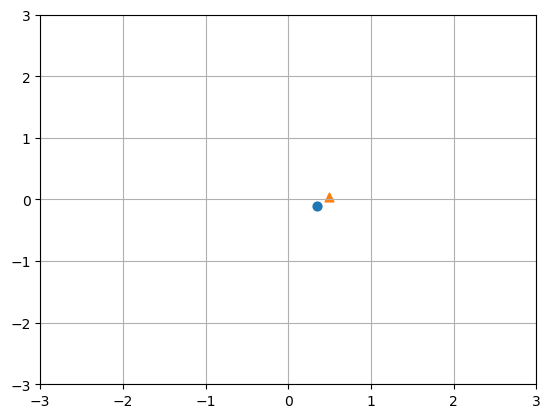

In [63]:
#用测试数据看预测情况
test_index=8
print('X_test[test_index]:',X_test[test_index])
print('obj_test[test_index]:',obj_test[test_index])
model_ehvi.eval()
predValues = model_ehvi.posterior(X_test[test_index].unsqueeze(0)).mean.detach()
predValues=predValues.squeeze(0)
print('predValues=',predValues)
#将obj_test和predValues表示在三维空间中
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111,)
ax.grid()
# ax.plot(predValues)
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.0, 3.0)
ax.scatter(obj_test[test_index, 0], obj_test[test_index, 1],
           c='C1', marker='^', s=40, label='test')
ax.scatter(predValues[0], predValues[1],
           c='C0', marker='o', s=40, label='train')

原始空间predValues= [[3.37477613e+02 7.90192981e-01]
 [6.32268330e+02 7.04908556e-01]
 [1.25354413e+02 7.24999669e-01]
 [1.05641927e+02 7.38919746e-01]
 [6.25047194e+02 7.75672587e-01]
 [9.20321372e+02 6.40000135e-01]
 [3.94836351e+02 8.16451372e-01]
 [5.84246401e+02 9.49269483e-01]
 [3.32379964e+02 7.63787200e-01]]
原始空间obj_test= [[2.4258e+02 8.9000e-01]
 [4.3570e+02 7.1900e-01]
 [1.2568e+02 6.8000e-01]
 [1.2824e+02 7.2000e-01]
 [3.5046e+02 8.7600e-01]
 [1.0469e+02 6.3000e-01]
 [1.5840e+02 5.5500e-01]
 [9.8477e+02 9.3900e-01]
 [2.3358e+02 7.8000e-01]]


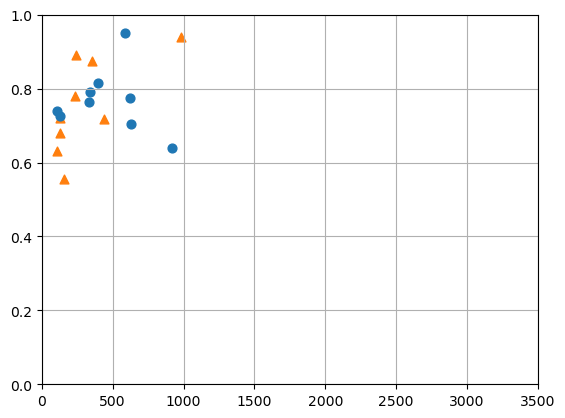

In [54]:
#用测试数据看预测情况
# print('X_test[test_index]:',X_test)
# print('obj_test[test_index]:',obj_test)
model_ehvi.eval()
predValues = model_ehvi.posterior(X_test.unsqueeze(0)).mean.detach()
predValues=predValues.squeeze(0)
#变换回原始空间
predValues_n=predValues.clone()
predValues_n[:,0] = -predValues_n[:,0]
obj_test_n=obj_test.clone()
obj_test_n[:,0] = -obj_test_n[:,0]
predValues_i=scalerStandard.inverse_transform(predValues_n.detach().numpy())
obj_test_i=scalerStandard.inverse_transform(obj_test_n.detach().numpy())

print('原始空间predValues=',predValues_i)
print('原始空间obj_test=',obj_test_i)
#绘图
fig = plt.figure()
ax = fig.add_subplot(111,)
ax.grid()
ax.set_xlim(0.0, 3500.0)
ax.set_ylim(0.0, 1.0)
ax.scatter(obj_test_i[:, 0], obj_test_i[:, 1],
           c='C1', marker='^', s=40, label='test')
ax.scatter(predValues_i[:,0], predValues_i[:,1],
           c='C0', marker='o', s=40, label='train')

In [13]:
# 5) 构造 reference point（需比所有观测点更差）
margin = 0.1
ref_point_np = (train_obj.min(axis=0) - margin).to_numpy()
# print(ref_point_np)
ref_point = torch.tensor(ref_point_np, dtype=torch.float)
print(ref_point)

tensor([-3.7461, -2.3924])


In [14]:
# Define Partitioning Method and Acquisition Function
partitioning = NondominatedPartitioning(
        ref_point=ref_point.clone().detach(),
        Y=obj_train)
#采集函数用于通过最大化超体积的期望改进来指导新数据点的选择。
acq_func = ExpectedHypervolumeImprovement(
        model=model_ehvi,
        ref_point=ref_point.clone().detach(),
        partitioning=partitioning)


C:\ProgramData\anaconda3\envs\PyTorchGPU\lib\site-packages\botorch\acquisition\multi_objective\analytic.py:137: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ref_point = torch.tensor(


推荐值: tensor([[1.0000, 0.5313, 0.0468, 0.4085]], dtype=torch.float64)
原始推荐值: [[1.6        1.31878612 0.00437452 0.00726819]]
分值: tensor(1.3747, dtype=torch.float64)
推荐值预测原始输出: [[546.94018875   0.95844191]]


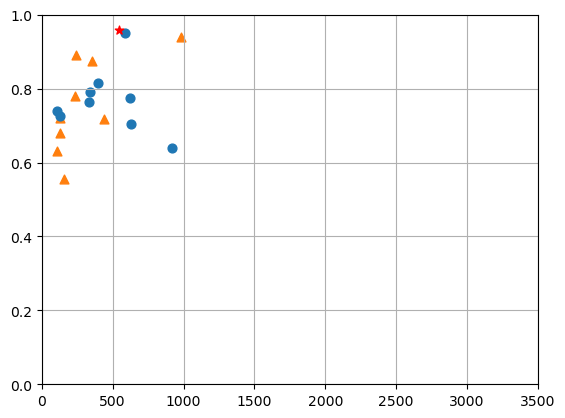

In [65]:
# 从模型取 dtype/device（根据你的 model_ehvi）
device = next(model_ehvi.parameters()).device
dtype = next(model_ehvi.parameters()).dtype
bounds = torch.tensor([[0.0, 0.0, 0.0, 0.0],
                       [1.0, 1.0, 1.0, 1.0]],
                      dtype=dtype, device=device)
next_x, acq_value=botorch.optim.optimize_acqf(acq_function=acq_func,
        bounds=bounds,
        q=1,
        num_restarts=20,
        raw_samples=50)
print("推荐值:", next_x)
#将next_x变换回原始输入空间
next_x_np = next_x.detach().numpy()
next_x_original = scalerMinMax.inverse_transform(next_x_np)
print("原始推荐值:", next_x_original)
print("分值:", acq_value)
model_ehvi.eval()
next_predValues = model_ehvi.posterior(next_x).mean
# print("推荐值预测值:", next_predValues)
#将next_predValues变换回原始输入空间
next_predValues[:,0] = -next_predValues[:,0]
next_predValues_np = next_predValues.detach().numpy()
next_predValues_original = scalerStandard.inverse_transform(next_predValues_np)
print("推荐值预测原始输出:", next_predValues_original)

fig = plt.figure()
ax = fig.add_subplot(111,)
ax.grid()
ax.set_xlim(0.0, 3500.0)
ax.set_ylim(0.0, 1.0)
ax.scatter(obj_test_i[:, 0], obj_test_i[:, 1],
           c='C1', marker='^', s=40, label='test')
ax.scatter(predValues_i[:,0], predValues_i[:,1],
           c='C0', marker='o', s=40, label='train')
ax.scatter(next_predValues_original[:,0], next_predValues_original[:,1],
           c='red', marker='*', s=40, label='train')

In [16]:
#候选网格点组合生成，4维输入，维度容易爆炸
import numpy as np
n = 5  # 示例：每维 5 个点，共 5**4 = 625 个组合

xs = np.linspace(0.0, 1.0, n)
X1, X2, X3, X4 = np.meshgrid(xs, xs, xs, xs, indexing='ij')  # 'ij' 保持顺序 (x1,x2,x3,x4)
X_test= torch.tensor(np.stack([X1.ravel(), X2.ravel(), X3.ravel(), X4.ravel()], axis=1))  # shape (n**4, 4)

# X_test也可以通过其他方式获得，比如正交试验设计等

# Compute EHVI Values for Each of Unlabeled Combinations
ehvi_values = []
for x in X_test:
    ehvi_value = acq_func(x.unsqueeze(0))
    ehvi_values.append(ehvi_value.item())

# Select Two Combinations with Largest EHVI Values
max_indices = heapq.nlargest(2, range(len(ehvi_values)),
                             key=ehvi_values.__getitem__)
# print("预测最大EHVI的x值:", X_test[max_indices[0]].tolist())
# print("预测次大EHVI的x值:", X_test[max_indices[1]].tolist())
next_x_np1 = X_test[max_indices[0]].unsqueeze(0).detach()
next_x_original1 = scalerMinMax.inverse_transform(next_x_np1)
print("预测最大EHVI的原始x值:", next_x_original1)
next_x_np2 = X_test[max_indices[1]].unsqueeze(0).detach()
next_x_original2 = scalerMinMax.inverse_transform(next_x_np2)
print("预测最大EHVI的原始x值:", next_x_original2)

model_ehvi.eval()
pred2 = model_ehvi.posterior(X_test).mean
# pred11 = pred2[max_indices[0]].detach().numpy()
# pred12 = pred2[max_indices[1]].detach().numpy()
# print('预测最大分值y值：',pred11)
# print('预测次大分值y值：',pred12)

#将pred11,pred12变换回原始输入空间
pred11=pred2[max_indices[0]].unsqueeze(0).detach().numpy()
pred11[:,0]=-pred11[:,0]
pred11_np_original = scalerStandard.inverse_transform(pred11)
print('预测最大分值原始y值：',pred11_np_original)
pred12=pred2[max_indices[1]].unsqueeze(0).detach().numpy()
pred12[:,0]=-pred12[:,0]
pred12_np_original = scalerStandard.inverse_transform(pred12)
print('预测最大分值原始y值：',pred12_np_original)

预测最大EHVI的原始x值: [[1.6   1.3   0.004 0.008]]
预测最大EHVI的原始x值: [[1.6   1.3   0.006 0.008]]
预测最大分值原始y值： [[584.2464008    0.94926948]]
预测最大分值原始y值： [[302.43552121   0.92617774]]
